<a href="https://colab.research.google.com/github/hayuni/DL-projects/blob/main/Face_Recodnition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face Recognition Using CNN

In [1]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
import os
import cv2
path = '/content/drive/MyDrive/Original Images'

# Read the dataset
for filename in os.listdir(path):
    # Check if the file is an image file
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Read the image file
        image = cv2.imread(os.path.join(path, filename))
        # Do something with the image, such as processing or analyzing it
    print ("readed")


readed
readed
readed
readed
readed
readed
readed
readed
readed
readed


In [6]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
#from keras_preprocessing import image
from tensorflow.keras.preprocessing import image

In [7]:
IMAGE_SIZE=256
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Original Images",seed=123,shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32

)


Found 1001 files belonging to 10 classes.


In [8]:
Label_names = dataset.class_names
Label_names

['Brad Pitt',
 'Claire Holt',
 'Henry Cavill',
 'Hrithik Roshan',
 'Hugh Jackman',
 'Jessica Alba',
 'Natalie Portman',
 'Priyanka Chopra',
 'Robert Downey Jr',
 'Vijay Deverakonda']

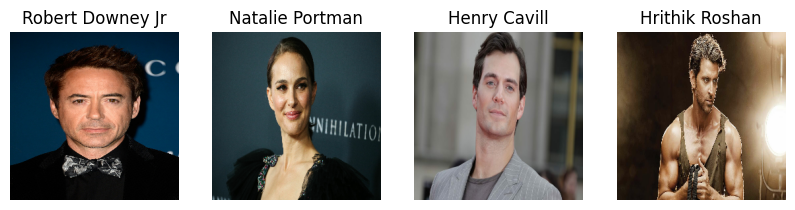

In [9]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(4):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(Label_names[labels_batch[i]])
        plt.axis("off")

In [10]:
def dataset_split(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_dataset = ds.take(train_size)
    val_dataset = ds.skip(train_size).take(val_size)
    test_dataset = ds.skip(train_size).skip(val_size)
    return train_dataset, val_dataset, test_dataset


In [11]:
train_dataset, val_dataset, test_dataset = dataset_split(dataset)


In [12]:
train_ds = train_dataset.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_dataset.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_dataset.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
])
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [13]:
train_ds = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)


In [14]:

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from keras.models import Model
from IPython.display import HTML


In [15]:
IMAGE_SIZE=256
BATCH_SIZE = 32
CHANNELS=3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])
model = tf.keras.models.Sequential([resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [17]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = opt,
    metrics = ["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [19]:
history = model.fit(train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=100
)

Epoch 1/100
25/25 [==============================] - 19s 317ms/step - loss: 1.9277 - accuracy: 0.2986 - val_loss: 2.0423 - val_accuracy: 0.2500
Epoch 2/100
25/25 [==============================] - 18s 260ms/step - loss: 1.9404 - accuracy: 0.3037 - val_loss: 1.9639 - val_accuracy: 0.3333
Epoch 3/100
25/25 [==============================] - 17s 286ms/step - loss: 1.9210 - accuracy: 0.3076 - val_loss: 1.8740 - val_accuracy: 0.2500
Epoch 4/100
25/25 [==============================] - 18s 256ms/step - loss: 1.9148 - accuracy: 0.3037 - val_loss: 1.9321 - val_accuracy: 0.2812
Epoch 5/100
25/25 [==============================] - 19s 300ms/step - loss: 1.8788 - accuracy: 0.3150 - val_loss: 1.8495 - val_accuracy: 0.3542
Epoch 6/100
25/25 [==============================] - 18s 277ms/step - loss: 1.8611 - accuracy: 0.3449 - val_loss: 1.8640 - val_accuracy: 0.2604
Epoch 7/100
25/25 [==============================] - 18s 255ms/step - loss: 1.8509 - accuracy: 0.3205 - val_loss: 1.8405 - val_accuracy:

In [23]:
model.save('saved_model.h5')

In [24]:
from tensorflow import keras

# Load the saved model
model = keras.models.load_model('saved_model.h5')

# Print a summary of the model architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)       

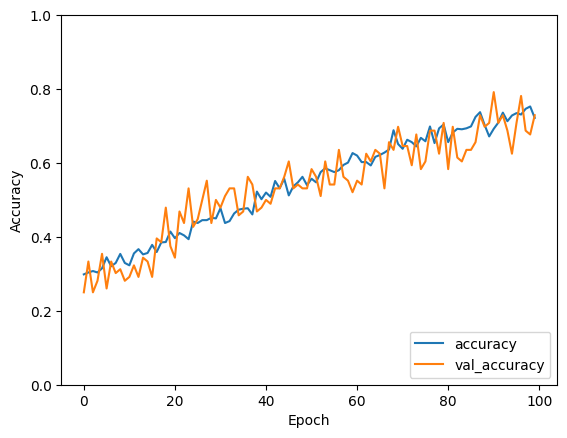

In [25]:
plot_folder = "plot"
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

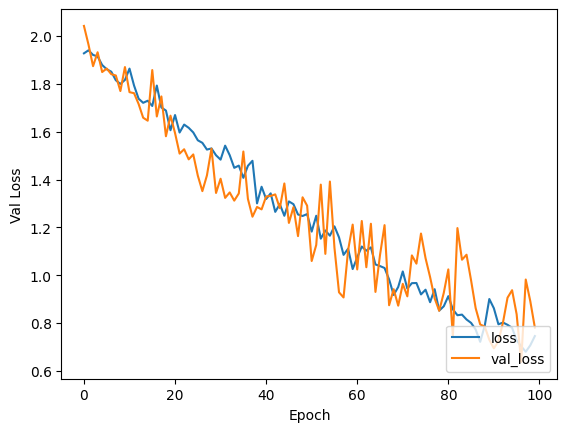

In [26]:
plot_folder = "plot"
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.legend(loc='lower right')

In [28]:
scores = model.evaluate(test_dataset)

4/4 [==============================] - 12s 28ms/step - loss: 1.1194 - accuracy: 0.6484


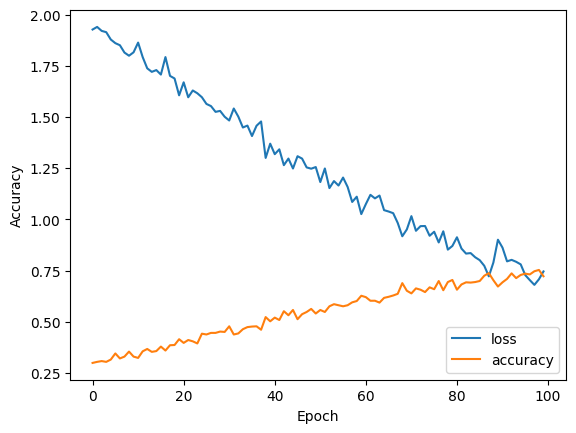

In [29]:
plot_folder = "plot"
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')